#### Parola desiderata

In [27]:
import numpy as np
import string
import matplotlib.pyplot as plt
import random
import time

# parola desiderata
model = "Banana"
model = list(model)
model_len = len(model)

#### Funzioni di utility per la generazione ed il check della "word"

In [9]:
def randomletter():
    return random.choice(string.ascii_letters + " " if " " in model else string.ascii_letters)

# genera parole random tra lettere minuscole e maiuscole
def randomword():
    # aggiungo 1 perché l'ultimo valore è un intero che rappresenta lo score della fitness
    word = [0] * (model_len + 1)
    for i in range(model_len):
        word[i] = randomletter()
    return word

# controlla se la parola contiene le lettere del modello e restituisce gli indici per cui
# NON si verifica questa condizione
def wordcheck(word):
    seq = [x for x in range(model_len)]
    index_seq = []
    for i in range(model_len):
        for j in range(model_len):
            if word[i] == model[j]:
                index_seq.append(i)
                break

    if index_seq != []:
         for i in index_seq:
            seq.remove(i)
    return seq

# rigenera casualmente le parole con fitness uguale a 0
def repop():
    for i in range(population_size):
        if words_population[i][-1] == 0:
            break
    if i > 0:
        words_population[i:population_size]= [randomword() for _ in range(population_size-i)]

#### Algoritmo Genetico

In [10]:
# assegna un punteggio alle parole
def fitness(words_population):
    for word in words_population:
        # l'indice -1, ovvero l'ultima posizione della lista, contiene lo score delle word
        word[-1] = 0
        for i in range(model_len):
            if word[i] in model:
                word[-1] += 1  # se contiene una lettera del modello
                for j in range(model_len):
                    if word[i] == model[j]:
                        if i == j:
                            word[-1] += 1  # se la lettera è al posto giusto

    # ordina in modo decrescente basandosi sullo score della fitness
    words_population.sort(reverse=True, key = lambda x: x[-1])

# crossover tra le parole migliori
def crossover(words_population, cross_perc=0.5):
    cross_point = int(model_len / 2)
    cross_size = int(len(words_population) * cross_perc)

    # controlla se la lunghezza del modello è dispari, se lo è aggiunge 1 al for
    odd_len = 1 if (model_len % 2 > 0) else 0

    for i in range(0, cross_size, 2):
        word1 = words_population[i]
        word2 = words_population[i+1]
        for i in range(cross_point+odd_len):
            word1[i] = word1[i+cross_point]
            word1[i+cross_point] = word2[i]

# sostituisce casualmente una lettera per ogni parola compresa nella percentuale di popolazione
def mutation(words_population, mut_perc=0.5):
    pop_len = len(words_population)
    mut_len = int(pop_len * mut_perc)

    for i in range(mut_len):
        # popola indices con gli indici per cui non si verifica l'uguaglianza tra
        # le lettere della word i-esima e quelle del modello
        indices = wordcheck(words_population[i])
        k =  random.randint(0, model_len-1)

        # se k è all'interno di indices vuol dire che word[k] non è presente nel modello
        # di conseguenza può essere cambiata con una nuova lettere random
        if k in indices:
            words_population[i][k] = randomletter()

#### Ciclo Generativo

risultato:  Banana
tempo trascorso: 0.2905sec
iterazioni: 74
fitness migliore: 12


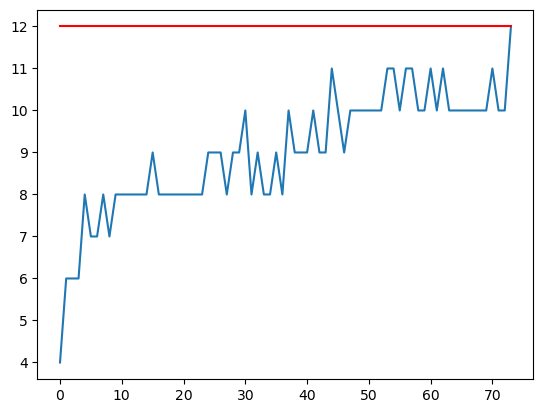

In [28]:
generation_num = 1000
population_size = 1000
# genera la popolazione iniziale di parole in modo casuale
words_population = [randomword() for i in range(population_size)]

# calcola il massimo della fitness dato dal modello
# servirà come escape in caso di raggiungimento dell'obiettivo
fitness_max = 2 * model_len
fitness_list = []

start_time = time.perf_counter()
end_time = None

for epoch in range(generation_num):
    fitness(words_population)
    fitness_list.append(words_population[0][-1])

    # rigenera casualmente le parole con fitness uguale a 0
    repop()

    # controlla se è stata raggiunta la fitness massima dalla prima parola della popolazione
    # (in ordine di fitness decrescente), se anche è uguale al modello, allora termina il ciclo
    if words_population[0][-1] == fitness_max and words_population[0][0:model_len] == model:
        end_time = time.perf_counter()
        break

    # crossover e mutation fino alla penultima iterazione
    if epoch != generation_num-1:
        crossover(words_population)
        mutation(words_population)

if end_time == None:
    end_time = time.perf_counter()

elapsed_time = end_time - start_time

print("risultato: ", ''.join(words_population[0][i] for i in range(model_len)))
print(f"tempo trascorso: {elapsed_time:.4f}sec\niterazioni: {epoch+1}")
print(f"fitness migliore: {fitness_list[-1]}")

# plot del massimo fitness raggiunto all'iterazione n-esima
n=np.arange(0,len(fitness_list))
plt.plot(n,fitness_list)
plt.plot(n, [fitness_max] * len(n), 'r')
plt.show()